# Instagram Reach Analysis


In [1]:
import pandas as pd

# Load the dataset
# Note that there may be a `UnicodeDecodeError: `utf-8' codec can't decode byte 0xa0 in position 288: invalid start byte` ...
# ... if you load the data with the default utf-8 codec of pandas read_csv method. So I'll load the data with  `ISO-8859-1` encoding
file_path = 'Instagram data.csv'

# Load dataset with a different encoding to handle potential encoding issues.
instagram_data = pd.read_csv(file_path, encoding='ISO-8859-1')

# Display the first few rows of the dataset to understand its structure
instagram_data.head()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...


The dataset has been successfully loaded. Here's a brief overview of the columns:

- **Impressions:** Number of impressions on a post (Reach)
- **From Home:** Reach from the home section
- **From Hashtags:** Reach from hashtags
- **From Explore:** Reach from the explore section
- **From Other:** Reach from other sources
- **Saves:** Number of saves
- **Comments:** Number of comments
- **Shares:** Number of shares
- **Likes:** Number of likes
- **Profile Visits:** Number of profile visits from the post
- **Follows:** Number of follows from the post
- **Caption:** Caption of the post
- **Hashtags:** Hashtags used in the post

## Analysis Plan

Let's start by analyzing the reach, which can be understood through the impressions, particularly how these impressions are broken down by source (home, hashtags, explore, and other). We'll also look at other engagement metrics like saves, comments, shares, and follows.

1. **Basic Statistics and Distribution of Impressions:** I'll begin by calculating some basic statistics (mean, median, etc.) and visualizing the distribution of impressions.

2. **Impressions by Source:** I'll analyze how impressions are distributed across different sources (home, hashtags, explore, and other).

3. **Correlation Analysis:** I'll examine the correlation between impressions and other engagement metrics (saves, comments, shares, likes, profile visits, follows).

4. **Engagement Metrics Analysis:** I'll explore the relationship between engagement metrics (likes, comments, shares) and impressions.

Let's start with the basic statistics and distribution of impressions.

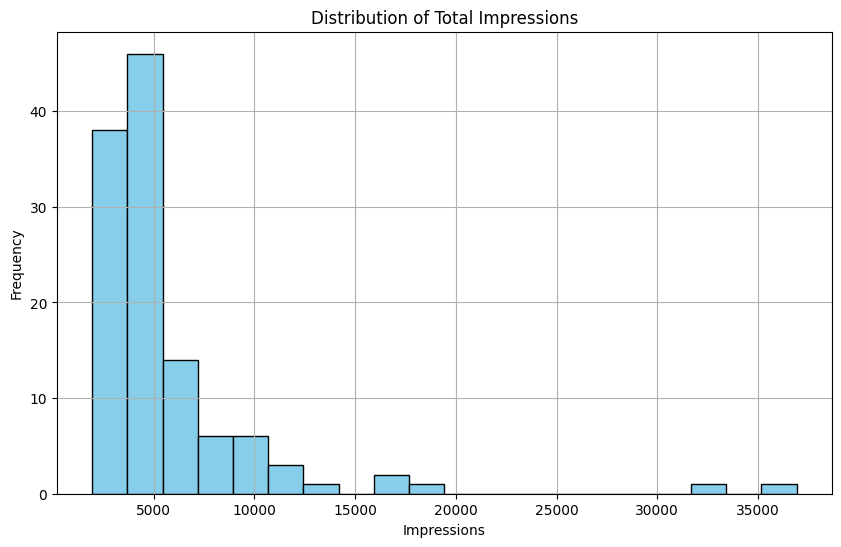

,Impressions,From Home,From Hashtags,From Explore,From Other
count,119.000000,119.000000,119.000000,119.000000,119.000000
mean,5703.991597,2475.789916,1887.512605,1078.100840,171.092437
std,4843.780105,1489.386348,1884.361443,2613.026132,289.431031
min,1941.000000,1133.000000,116.000000,0.000000,9.000000
25%,3467.000000,1945.000000,726.000000,157.500000,38.000000
50%,4289.000000,2207.000000,1278.000000,326.000000,74.000000
75%,6138.000000,2602.500000,2363.500000,689.500000,196.000000
max,36919.000000,13473.000000,11817.000000,17414.000000,2547.000000


In [2]:
import matplotlib.pyplot as plt

# Calculate basic statistics for Impressions
impressions_stats = instagram_data[['Impressions', 'From Home', 'From Hashtags', 'From Explore', 'From Other']].describe()

# Plot the distribution of total impressions
plt.figure(figsize=(10, 6))
plt.hist(instagram_data['Impressions'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Total Impressions')
plt.xlabel('Impressions')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

impressions_stats


The histogram above shows the distribution of total impressions for the Instagram posts in your dataset. Here are some key statistics:
- **Mean Impressions:** 5704
- **Median Impressions (50th Percentile):** 4289
- **Maximum Impressions:** 36,919
- **Minimum Impressions:** 1,941

The distribution indicates that most posts have impressions clustering around the lower end, with a few posts reaching significantly higher impressions.

Next, let's analyze how these impressions are distributed across different sources (home feed, hashtags, explore, and others). 

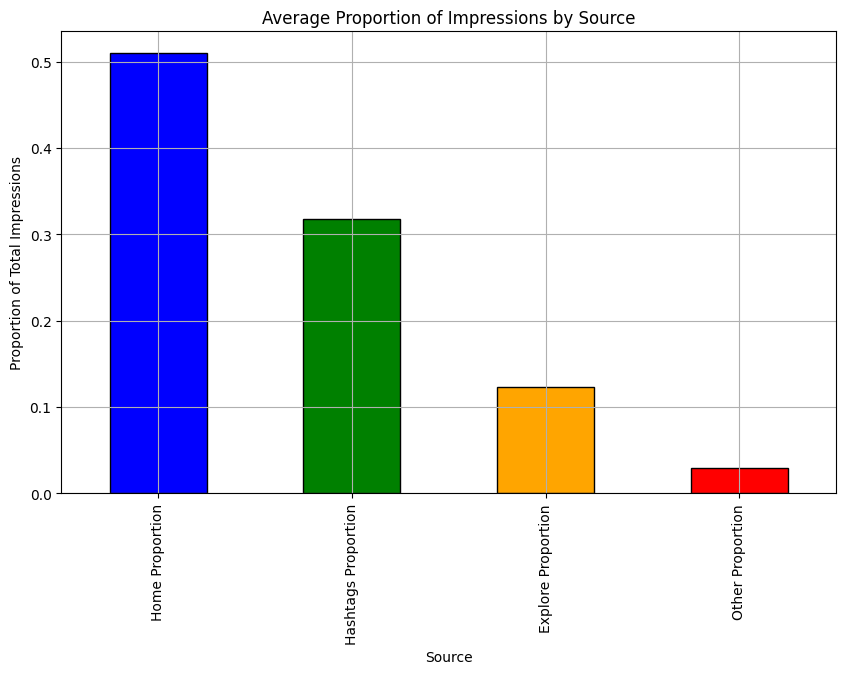

Home Proportion        0.509610
Hashtags Proportion    0.318108
Explore Proportion     0.122876
Other Proportion       0.029767
dtype: float64

In [3]:
# Calculate the proportion of impressions from each source
instagram_data['Home Proportion'] = instagram_data['From Home'] / instagram_data['Impressions']
instagram_data['Hashtags Proportion'] = instagram_data['From Hashtags'] / instagram_data['Impressions']
instagram_data['Explore Proportion'] = instagram_data['From Explore'] / instagram_data['Impressions']
instagram_data['Other Proportion'] = instagram_data['From Other'] / instagram_data['Impressions']

# Plot the average proportion of impressions by source
source_proportions = instagram_data[['Home Proportion', 'Hashtags Proportion', 'Explore Proportion', 'Other Proportion']].mean()

plt.figure(figsize=(10, 6))
source_proportions.plot(kind='bar', color=['blue', 'green', 'orange', 'red'], edgecolor='black')
plt.title('Average Proportion of Impressions by Source')
plt.ylabel('Proportion of Total Impressions')
plt.xlabel('Source')
plt.grid(True)
plt.show()

source_proportions


The bar chart above shows the average proportion of impressions by source:

- **Home Feed:** ~51% of impressions come from the home feed.
- **Hashtags:** ~32% of impressions are generated through hashtags.
- **Explore Page:** ~12% of impressions come from the explore page.
- **Other Sources:** ~3% of impressions are from other sources.

This indicates that the home feed is the most significant driver of impressions, followed by hashtags, with the explore page playing a smaller role.

Next, I'll perform a correlation analysis to explore the relationships between impressions and other engagement metrics like saves, comments, shares, likes, profile visits, and follows.

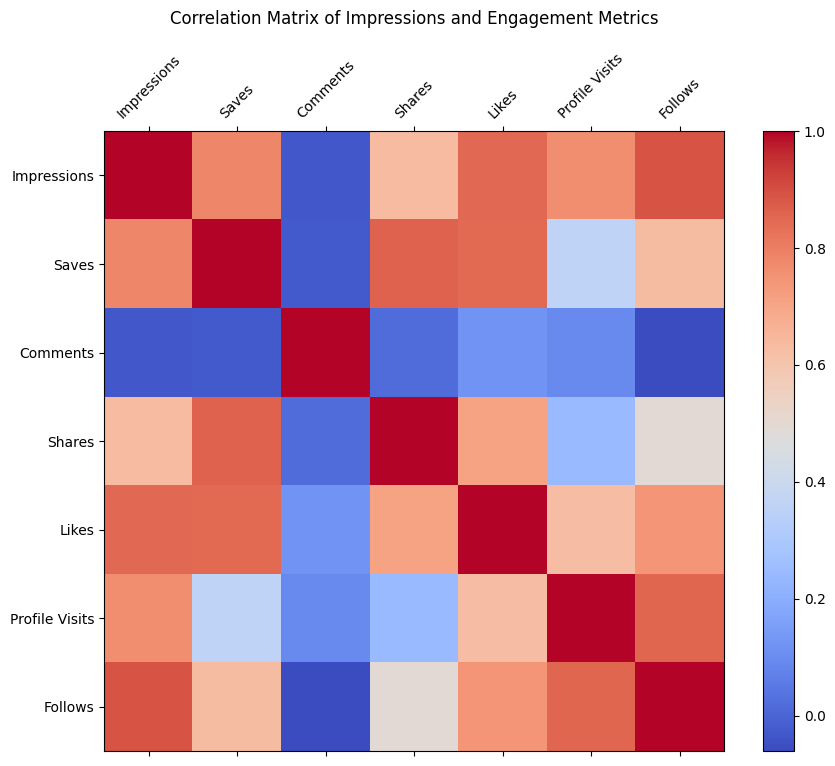

Impressions       1.000000
Follows           0.889363
Likes             0.849835
Saves             0.779231
Profile Visits    0.760981
Shares            0.634675
Comments         -0.028524
Name: Impressions, dtype: float64

In [4]:
# Calculate the correlation matrix
correlation_matrix = instagram_data[['Impressions', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits', 'Follows']].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
plt.matshow(correlation_matrix, cmap='coolwarm', fignum=1)
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Matrix of Impressions and Engagement Metrics', pad=20)
plt.show()

correlation_matrix['Impressions'].sort_values(ascending=False)


The correlation analysis reveals the following relationships between impressions and various engagement metrics:

- **Follows:** Strong positive correlation (0.89) with impressions, indicating that posts with higher impressions tend to result in more follows.
- **Likes:** High positive correlation (0.85) with impressions, suggesting that posts with more impressions generally receive more likes.
- **Saves:** Moderate positive correlation (0.78) with impressions, showing that higher impressions are associated with more saves.
- **Profile Visits:** Moderate positive correlation (0.76) with impressions, indicating that more impressions lead to more profile visits.
- **Shares:** Moderate positive correlation (0.63) with impressions, suggesting that posts with more impressions are more likely to be shared.
- **Comments:** There is almost no correlation (-0.03) between impressions and comments, implying that the number of impressions does not significantly influence the number of comments.

These findings suggest that higher impressions are generally associated with increased engagement, particularly in terms of follows, likes, and saves.